In [33]:
import pandas as pd

In [34]:
data = pd.read_csv('smsspamcollection/SMSSpamCollection' , sep='\t' , header=None)

In [35]:
data

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [36]:
data.columns=['label','message']

In [37]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Cleaning and Text Prepocessing

In [38]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
stopword_list = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]


In [41]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
#Stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
corpus = []
for i in range(0 , len(data)):
    review = re.sub('[^a-zA-Z0-9]',' ',data['message'][i])
    review.lower()
    review.split()
    review = [ps.stem(word) for word in review if not word in stopword_list]
    review = ''.join(review)
    corpus.append(review)

In [44]:
corpus

['G unl jurng pn  crz   Avlble nl n bug n gre wrl l e buffe    Cne here g re w   ',
 'Ok lr    Jkng wf u n   ',
 'Free enr n 2  wkl cp  wn FA Cup fnl k 21 M 2005  Tex FA  87121  receve enr quen  x re T C  ppl 08452810075ver18 ',
 'U un   erl hr    U c lre hen    ',
 'Nh I n  hnk he ge  uf  he lve run here hugh',
 'FreeMg He here rlng   been 3 week  nw n n wr bck  I  lke e fun u up fr  ll  Tb k  XxX  chg  en   1 50  rcv',
 'Even  brher  n lke  pek wh e  The re e lke  pen ',
 'A per ur reque  Melle Melle  Oru Mnnnungne Nurungu Ve   h been e  ur cllerune fr ll Cller  Pre  9  cp ur fren Cllerune',
 'WINNER   A  vlue newrk cuer u hve been elece  receve  900 prze rewr  T cl cll 09061701461  Cl ce KL341  Vl 12 hur nl ',
 'H ur ble 11 nh r re  U R enle  Upe  he le clur ble wh cer fr Free  Cll The Mble Upe C FREE n 08002986030',
 'I  gnn be he n n  n  wn  lk bu h uff nre ngh  k  I ve cre enugh  ',
 'SIX chnce  wn CASH  Fr 100  20 000 pun x  CSH11 n en  87575  C 150p   6  16  TnC ppl Repl HL 4 n

### Splitting dataset in x and y

In [70]:
data.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [71]:
y = pd.get_dummies(data['label'], drop_first=True)

In [72]:
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(corpus , y , test_size=0.3)

In [74]:
X_train

['Tr hen   brn lr    A ler  ce n c lr    Mb   nev e prperl   g  help hee wf     ',
 'He    Wh e  ur rvng n fr  We g fr evlun n fr ',
 'Ok  N n  ju hnng n  Th w en  be gnng  bu h un beer ',
 'An everl  u r ',
 'N   n hvng n n ve n  lpp',
 'K  k  hw uch e  c ',
 'YES  The nl plce n wn  ee excng ul ngle  nw n he UK  Tx CHAT  86688 nw  150p Mg ',
 'Her  ep whu lve   Mn  ep whu w   Ee r ep whu re  p  Lfe  ep whu frn   S Alw Be In Tuch  G ngh  p  wee re',
 'A n nr hk up  gg hk up  nng    ',
 'N 1 POLYPHONIC ne 4 ur b ever week  Ju x PT2  87575  1 Tne FREE    ge xn nw n ell ur fren  150p ne  16 repl HL 4nf',
 'I rech he fe n un l   ',
 'FREE RINGTONE ex FIRST  87131 fr  pl r ex GET  87131 fr  rue ne  Help  0845 2814032 16 fer 1 free  ne re 3x 150pw  e n x p',
 'He gl   Anne f u gng wn  e rvng cenre r ',
 'Chbn c uk  Ge l f ch h weeken   www chbn c uk Der Welce  he weeken We hve g ur bgge n be EVER ch gve w   Thee  ',
 'Ye   reg   C ',
 'Hw uch he pe  Sugn ',
 'Surl ll gve   u    whle cng  rev

<AxesSubplot:>

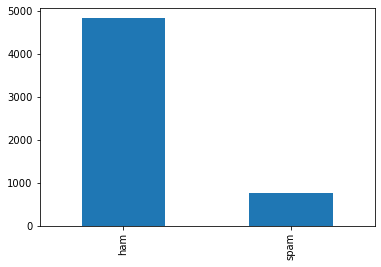

In [75]:
#Verifying the imbalanced data
import matplotlib.pyplot as plt
data['label'].value_counts().plot(kind = 'bar')

The data seems to be imballanced

## Creating Bag of word

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [77]:
X_train = vectorizer.fit_transform(X_train).toarray()

In [78]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
X_test = vectorizer.transform(X_test).toarray()

In [80]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
X_train.shape , y_train.shape

((3900, 4981), (3900, 1))

In [84]:
vectorizer.vocabulary_

{'tr': 4373,
 'hen': 2330,
 'brn': 1018,
 'lr': 2868,
 'ler': 2773,
 'ce': 1140,
 'mb': 2949,
 'nev': 3140,
 'prperl': 3648,
 'help': 2322,
 'hee': 2309,
 'wf': 4768,
 'he': 2303,
 'wh': 4770,
 'ur': 4561,
 'rvng': 4023,
 'fr': 2006,
 'we': 4728,
 'evlun': 1818,
 'ok': 3312,
 'ju': 2620,
 'hnng': 2399,
 'th': 4315,
 'en': 1692,
 'be': 840,
 'gnng': 2183,
 'bu': 1040,
 'un': 4482,
 'beer': 852,
 'an': 743,
 'everl': 1813,
 'hvng': 2497,
 've': 4625,
 'lpp': 2866,
 'hw': 2498,
 'uch': 4435,
 'yes': 4947,
 'the': 4321,
 'nl': 3193,
 'plce': 3468,
 'wn': 4835,
 'ee': 1617,
 'excng': 1842,
 'ul': 4478,
 'ngle': 3168,
 'nw': 3280,
 'uk': 4476,
 'tx': 4407,
 'chat': 1169,
 '86688': 627,
 '150p': 287,
 'mg': 2978,
 'her': 2335,
 'ep': 1739,
 'whu': 4800,
 'lve': 2911,
 'mn': 3006,
 're': 3742,
 'lfe': 2785,
 'frn': 2047,
 'alw': 740,
 'in': 2533,
 'tuch': 4392,
 'ngh': 3166,
 'wee': 4734,
 'nr': 3237,
 'hk': 2362,
 'up': 4540,
 'gg': 2143,
 'nng': 3209,
 'polyphonic': 3525,
 'ne': 3097,
 'ever

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
classifier = RandomForestClassifier()

In [87]:
classifier.fit(X_train,y_train)

<ipython-input-87-c8b679b88806>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


RandomForestClassifier()

In [88]:
y_pred = classifier.predict(X_test)

In [89]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [92]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [93]:
accuracy_score(y_test, y_pred)

0.9730861244019139

In [94]:
confusion_matrix(y_test, y_pred)

array([[1470,    0],
       [  45,  157]], dtype=int64)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1470
           1       1.00      0.78      0.87       202

    accuracy                           0.97      1672
   macro avg       0.99      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672

